# Final Case Study


#### Steven Hayden, Kevin Mendonsa, Joe Schueder, Nicole Wittlin  

---
## Introduction: 

We have been provided a dataset comprising 50 explanatory variables and one response variable with the objective of minimizing cost of the predicted response using provided cost penalties to the business. The dataset contains 160,000 observations. Given the lack of domain knowledge and intrinsic information about the dataset, we will conduct a comprehensive exploratory data analysis (EDA) to understand the charactersitics of the data and the variables. The response variable "y" is binary (1,0). 

No additional information has been provided and therefore the data analysis and processing of the information is critical for delivering optimal results.  We will clearly articulate any assumptions we make in order to reach our conclusions.

## Business Imperative:
The business imperative for this analysis is to reduce False Negatives as a priority as they appear to have a greater adverse impact to the business in question.  False Positives while important are 50 times less impactful than False Negatives.

We have therefore been informed that each False Positive prediction will cost the business \\$10 and each False Negative prediction will cost the business \\$500. True Positives and True Negatives have no effect on the business cost. Given that False Negatives have a higher cost penalty of (\\$500), Recall scores are critical in this analysis. Precision is also important with a cost penalty of \\$10. Correct predictions are "zero cost". 

The delivered model must be able to be deployed in a production environment and be generalized for future application of new data.  We will methodically step through various steps from cursory data review to an in-dept data analysis, baselining, modeling, dimensionality reduction, optimization and tuning and conclusions.

---

## Methodology and organization of our analysis
Our analysis will step through the following stages building upon the conclusions and decisions of previous findings as we transition to an optimal conclusion to support the business imperative for this analysis.

### Exploratory Data Analysis (EDA)
- Data classes of features
- Validate Normality assumptions
- Check Cardinality
- Missing Data
- Validate Independence assumptions
    - Pearson's Correlation
    - Phi K Correlation
- Outliers


### Preprocessing
- **Data Cleanup**
    - Renaming values
    - Stripping out special characters
    - Conversion of data classes - String to float
  

- **Imputation Strategy to address missing data**
    - Impute or drop
    
- **One-hot Encoding of categorical variables**


- **Standardization**
    - MinMax scaling
    
- **Sampling strategy for testing and training splits**


### Establish a Baseline for comparison
- Modeling using diverse machine learning model algorithms (rationale for models selected)
- Develop a baseline Cost-Benefit Matrix based on provided cost penalties
 
###  Dimensionality Reduction (Feature Reduction)
- Recursive feature extraction (Dimensionality Reduction - Occams's Razor)
 
###  Cross Validation using K-fold (Model generalization and optimization)
 
###  Parameter Tuning and Optimization
 
###  Ensembling
- Methods use multiple learning algorithms to derive improved predictive performance than a single learning algorithm.
 
###  Error Metrics
- Grid Search
- Confusion Matrix - Model accuracy and predictive power
- ROC-AUC
- Recall
- Precision
- F1 scores

###   Conclusion and findings
- Cost/Benefits Matrix - Translate into business terms/discovery
---

In [44]:
# Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from collections import Counter
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, StackingClassifier
import itertools
from sklearn.feature_selection import RFECV
from vecstack import stacking
from mlxtend.classifier import StackingCVClassifier
from mlxtend.plotting import plot_learning_curves, plot_decision_regions
from sklearn.pipeline import Pipeline
import itertools
from  IPython import display

import warnings
warnings.simplefilter('ignore')

# Exploratory Data Analysis

### Load the data to the workspace

- Load the data as a data frame and conduct cursory analysis to review
    - Shape
    - Variable Classes (datatypes)
    - Missingness of data (NULL data)
    - Unique values for Cardinality

For clarity and consistency we will refer to Explanatory variables as Features.

In [45]:
# Load the data
%time Business_Data = pd.read_csv('final_project.csv')

Wall time: 2.54 s


In [46]:
# Explore the data
Business_Data.shape

(160000, 51)

In [47]:
# Check data type and not null counts of all the columns
Business_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

There are 5 categorical features, 45 continuous features of float64 data type.  The response variable is binary classed as an integer.

---
### Analysis of Missing data (NULLs) by feature for determining an imputation strategy
---

In [49]:
# Get NULL counts by column
Business_Data.isnull().sum()

x0     26
x1     25
x2     38
x3     37
x4     26
x5     37
x6     26
x7     27
x8     21
x9     30
x10    43
x11    30
x12    36
x13    31
x14    34
x15    35
x16    26
x17    27
x18    40
x19    35
x20    38
x21    29
x22    27
x23    47
x24    28
x25    22
x26    36
x27    30
x28    35
x29    30
x30    30
x31    39
x32    31
x33    41
x34    41
x35    30
x36    27
x37    23
x38    31
x39    23
x40    36
x41    40
x42    26
x43    37
x44    40
x45    29
x46    31
x47    37
x48    32
x49    32
y       0
dtype: int64

---
- TOTAL NULL counts of all features: **1608**
- Percentage of NULL values against total data: 1608/160000 => **1.005%**

#### The Imputation strategy and actions are listed further below

---
### Inspect all features for Cardinality (Unique classes per variable)
This will enable the identification of cardinality in features and also identify candidates for conversion to a categorical data class.

In [1]:
# Examine Unique values by variable
Business_Data.nunique(dropna=False)

NameError: name 'Business_Data' is not defined

### Closer review of the categorical features identified above
- A closer analysis reveals that features **x32** and **x37** have special characters. 
- Additionally feature **x32** has **low cardinality** with only 13 unique classes in 160,000 observations. 

In [51]:
# Review and analyze the Categorical features and response as indicated above
print('Unique classes of feature x24:: \n',Business_Data.x24.value_counts(dropna = False))
print('\nUnique values of feature x29:: \n',Business_Data.x29.value_counts(dropna = False))
print('\nUnique values of feature x30:: \n',Business_Data.x30.value_counts(dropna = False))
print('\nUnique values of feature x32:: \n',Business_Data.x32.value_counts(dropna = False))
print('\nUnique values of response y:: \n',Business_Data.y.value_counts(dropna = False))

Business_Data.x37.head()

Unique classes of feature x24:: 
 asia       138965
euorpe      16538
america      4469
NaN            28
Name: x24, dtype: int64

Unique values of feature x29:: 
 July       45569
Jun        41329
Aug        29406
May        21939
sept.      10819
Apr         6761
Oct         2407
Mar         1231
Nov          337
Feb          140
NaN           30
Dev           23
January        9
Name: x29, dtype: int64

Unique values of feature x30:: 
 wednesday    101535
thurday       29429
tuesday       27954
friday          564
monday          488
NaN              30
Name: x30, dtype: int64

Unique values of feature x32:: 
 0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
NaN          31
-0.05%        6
0.05%         1
Name: x32, dtype: int64

Unique values of response y:: 
 0    95803
1    64197
Name: y, dtype: int64


0     $1313.96
1     $1962.78
2      $430.47
3    $-2366.29
4     $-620.66
Name: x37, dtype: object

### Clean-up of categorical features - x32 and x37

#### Actions:
- Strip feature **x37** off all special characters 
- Convert feature **x37** to a float data class
- Retain feature **x32** as a categorical feature

In [52]:
#### Strip special characters in feature x37

Business_Data['x37'] = Business_Data['x37'].str.replace('$','').astype(float)

In [53]:
Business_Data.x32.head()

0      0.0%
1    -0.02%
2    -0.01%
3     0.01%
4     0.01%
Name: x32, dtype: object

In [54]:
# Feature x32 class distribution
Business_Data.x32.value_counts()

0.01%     40767
-0.01%    34094
0.0%      33923
-0.0%     30492
-0.02%     9924
0.02%      7987
-0.03%     1727
0.03%       855
-0.04%      138
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64

In [55]:
Business_Data.x37.head()

0    1313.96
1    1962.78
2     430.47
3   -2366.29
4    -620.66
Name: x37, dtype: float64

# Imputation strategy

Impute the nulls with appropriate values after determining if they are 
- Missing Completely At Random (MCAR)
- Missing At Random (MAR)
- Missing Not At Random (MNAR)

After discussions with the business, it has been determined that the missing data is to be treated as Missing At Random (MAR).  Furthermore, since almost all the continuous features have a gaussian distribution and meet the assumptions for normality (refer to Pandas Profiling report for additional details), it was agreed to replace NULL values in continuous features with the "median" of tyhat feature and drop records with missing values or NANs in categorical values

#### Analysis:
- TOTAL NULL counts of all features: **1608**
- Percentage of total data: 1608/160000 => **1.005%**

#### Actions:
- Impute missing values of continuous features with the median
- Drop missing values for categorical features given the large dataset of 160000 records


In [56]:
# Create a new data frame and fill null values as 
# per the imputation strategy agreed with the business.
# Replace missing values in continuous features with the median
Business_Data_imputed = Business_Data.apply(lambda x: x if x.dtype == 'object' else x.fillna(x.median()))

In [57]:
Business_Data_imputed.isnull().sum()

x0      0
x1      0
x2      0
x3      0
x4      0
x5      0
x6      0
x7      0
x8      0
x9      0
x10     0
x11     0
x12     0
x13     0
x14     0
x15     0
x16     0
x17     0
x18     0
x19     0
x20     0
x21     0
x22     0
x23     0
x24    28
x25     0
x26     0
x27     0
x28     0
x29    30
x30    30
x31     0
x32    31
x33     0
x34     0
x35     0
x36     0
x37     0
x38     0
x39     0
x40     0
x41     0
x42     0
x43     0
x44     0
x45     0
x46     0
x47     0
x48     0
x49     0
y       0
dtype: int64

#### Drop NULL observations in categorical features

Given the extremely low count of NULLs in the categorical features, dropping these observations still retain 159912 of the 160000 rows. This is approximately **0.07
%** of the original data set.  It should likely have little to no impact on the overall analysis.

- x24 - $28$
- x29 - $30$
- x30 - $30$
- x32 - $31$

In [58]:
# Drop NULLS in categorical features
Business_Data_imputed.dropna(inplace=True)

In [59]:
# Clean-up classes in some categorical features for consistency and spelling errors
Business_Data_imputed['x24'] = Business_Data_imputed['x24'].replace(['asia', 'euorpe','america'], ['Asia', 'Europe','America'])
Business_Data_imputed['x29'] = Business_Data_imputed['x29'].replace(['sept.', 'January','Dev','July'], ['Sep', 'Jan','Dec','Jul'])
Business_Data_imputed['x30'] = Business_Data_imputed['x30'].replace(['monday', 'tuesday','wednesday','thurday','friday'], ['Mon', 'Tue','Wed','Thu','Fri'])

In [60]:
print('Unique values of Business_Data x24:: \n',Business_Data_imputed.x24.value_counts(dropna = False))
print('\nUnique values of Business_Data x29:: \n',Business_Data_imputed.x29.value_counts(dropna = False))
print('\nUnique values of Business_Data x30:: \n',Business_Data_imputed.x30.value_counts(dropna = False))
print('\nUnique values of Business_Data x32:: \n',Business_Data_imputed.x32.value_counts(dropna = False))

Unique values of Business_Data x24:: 
 Asia       138880
Europe      16534
America      4467
Name: x24, dtype: int64

Unique values of Business_Data x29:: 
 Jul    45546
Jun    41299
Aug    29385
May    21932
Sep    10815
Apr     6758
Oct     2407
Mar     1231
Nov      336
Feb      140
Dec       23
Jan        9
Name: x29, dtype: int64

Unique values of Business_Data x30:: 
 Wed    101473
Thu     29413
Tue     27943
Fri       564
Mon       488
Name: x30, dtype: int64

Unique values of Business_Data x32:: 
 0.01%     40746
-0.01%    34078
0.0%      33902
-0.0%     30479
-0.02%     9916
0.02%      7981
-0.03%     1726
0.03%       854
-0.04%      137
0.04%        55
-0.05%        6
0.05%         1
Name: x32, dtype: int64


# One Hot encoding for Categorical Features

One Hot Encoding (ohe) is a popular approach in which a categorical feature is converted to a format enhances the predictive capability of ML algorithms. It works best when the cardinality of the categorical feature is low and is not advisable where there are more than 15 different classes within a single feature. 


![title](img/OneHotEncoding2.png)

Reference: https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding

#### Parameter options used for pd.get_dummies
- data - Data of which to get dummy indicators 
    - Parameter setting: **Project_Data_imputed**
- prefix_sep - If appending prefix, separator/delimiter to use. Or pass a list or dictionary as with prefix.
    - Parameter setting: **"_"**
- drop_first - Whether to get k-1 dummies out of k categorical levels by removing the first level
    - Parameter setting: **True**
- columns - Names as list of Categorical features for one hot encoding.
    - Parameter setting: **cat_columns** 

In [61]:
# Create a variable "cat_columns" to include all features to be encoded
cat_columns = ['x24', 'x29', 'x30','x32']

# Use the pandas get_dummies function to encode the selected categorical features
Business_Data_ohe = pd.get_dummies(Business_Data_imputed, prefix_sep="_", drop_first=True, columns=cat_columns)

In [86]:
# Review the results of the encoding operation
Business_Data_ohe.isnull().sum()
Business_Data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159881 entries, 0 to 159999
Data columns (total 75 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   x0           159881 non-null  float64
 1   x1           159881 non-null  float64
 2   x2           159881 non-null  float64
 3   x3           159881 non-null  float64
 4   x4           159881 non-null  float64
 5   x5           159881 non-null  float64
 6   x6           159881 non-null  float64
 7   x7           159881 non-null  float64
 8   x8           159881 non-null  float64
 9   x9           159881 non-null  float64
 10  x10          159881 non-null  float64
 11  x11          159881 non-null  float64
 12  x12          159881 non-null  float64
 13  x13          159881 non-null  float64
 14  x14          159881 non-null  float64
 15  x15          159881 non-null  float64
 16  x16          159881 non-null  float64
 17  x17          159881 non-null  float64
 18  x18          159881 non-

# Correlation Matrix

We used correlation plot to identify the attributes in the original dataset that appeared to be highly collinear. In other words, one predictor feature in the regression model can be linearly predicted from the others with a substantial degree of accuracy.


**Pearson's Correlation**

The Pearson correlation coefficient is used to measure the strength of a linear association between two variables, where the value r = 1 means a perfect positive correlation and the value r = -1 means a perfect negataive correlation. It inofrms whether a statistically significant linear relationship exists between two continuous variables. The strength of a linear relationship (i.e., how close the relationship is to being a perfectly straight line) 

(Reference: https://www.dummies.com/education/math/statistics/how-to-interpret-a-correlation-coefficient-r/)

Interpretation of Pearson's coefficient.
* Exactly –1. A perfect downhill (negative) linear relationship

* –0.70. A strong downhill (negative) linear relationship

* –0.50. A moderate downhill (negative) relationship

* –0.30. A weak downhill (negative) linear relationship

* 0. No linear relationship

* +0.30. A weak uphill (positive) linear relationship

* +0.50. A moderate uphill (positive) relationship

* +0.70. A strong uphill (positive) linear relationship

* Exactly +1. A perfect uphill (positive) linear relationship

![title](img/PearsonCorrelation.png) 

Since the data set is large, the correlation plot was not very informative when plotted using all the features. So, we filtered only those features that had a score greater than 0.8 in the below figure. Based on the analysis, features $x6$ and $x41$ were excluded as they were highly correlated with $x2$ and $x38$ respectively (corr = 1 were excluded to avoid displaying self correlated features).


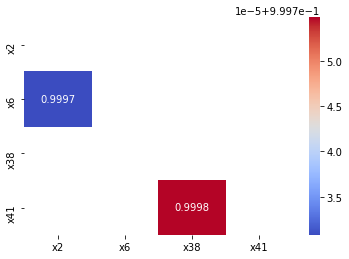

In [67]:
corr = Business_Data_ohe_scaled.corr()

kot = corr[(corr>=.8) & (corr<1)]
kot.dropna(axis=0, how='all', inplace = True)
kot.dropna(axis=1, how='all', inplace = True)

matrix = np.triu(kot)
sns.heatmap(kot, annot=True, fmt='.4g', cmap= 'coolwarm', mask = matrix)

In [68]:
kot

,x2,x6,x38,x41
x2,NaN,0.999731,NaN,NaN
x6,0.999731,NaN,NaN,NaN
x38,NaN,NaN,NaN,0.999755
x41,NaN,NaN,0.999755,NaN


# Outliers

# Standardization of the data - Scaling

A pre-processing step applied to independent features in a dataset. Primarily it normalizes within a particular range. It may also aid in accelerating the computations in an algorithm. The Features have been scaled to a mean of 0 and variance of 1 to improve accuracy of the classification models.

*fit_transform* within MinMaxScaler() function fits to data, then transform it. Fits transformer to X and y with optional parameters fit_params and returns a transformed version of X.

In [64]:
scaler = MinMaxScaler()

In [65]:
Business_Data_ohe_scaled = pd.DataFrame(scaler.fit_transform(Business_Data_ohe), columns=Business_Data_ohe.columns)

In [66]:
Business_Data_ohe_scaled.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x32__-0.02%,x32__-0.03%,x32__-0.04%,x32__-0.05%,x32__0.0%,x32__0.01%,x32__0.02%,x32__0.03%,x32__0.04%,x32__0.05%
count,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,...,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000,159881.000000
mean,0.498395,0.484268,0.473770,0.476629,0.520278,0.487751,0.473779,0.525666,0.490752,0.505541,...,0.062021,0.010796,0.000857,0.000038,0.212045,0.254852,0.049918,0.005341,0.000344,0.000006
std,0.116206,0.116829,0.107960,0.108415,0.116644,0.110552,0.107965,0.092364,0.115988,0.114781,...,0.241195,0.103340,0.029260,0.006126,0.408758,0.435779,0.217777,0.072890,0.018544,0.002501
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419959,0.405735,0.400452,0.403659,0.441475,0.413356,0.400452,0.466303,0.412554,0.428507,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.498073,0.484334,0.472208,0.476525,0.520300,0.487755,0.472214,0.527888,0.490927,0.505554,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.576522,0.563162,0.547144,0.550157,0.598995,0.562359,0.547160,0.585873,0.568981,0.583199,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [69]:
# Drop features 'x6', 'x41' due to high correlation as identified above
Project_Data_final = Business_Data_ohe_scaled.drop(['x6', 'x41'], axis = 1)

# Start Modeling

### Splitting data set into Response and Explanatory Variables 

In [70]:
X = Project_Data_final.drop(columns=['y'], axis=1)
y = Project_Data_final.y

### Train Test Split

This technique provides us a way of voluntarily holding back part of the data to test whether the model works. If we use our entire dataset to train the model, then the model will alway predict the correct category for any entry in the data set. This process of setting aside a part of the dataset voluntarily to evaluate the model stops the model from being too optimistic when predicting the outcome. Training the model on the entire data set could also lead to data snooping bias. This kind of bias results from refining too many parameters to improve the model's performance on a data set. In our analysis, we will split the data into training and test data sets (75:25) randomly. 

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

#### Check the response ratio in Train-Test split

Let's check the ratio of the response variables and compare it with that of the Train and Test dataset. The below results confirm that the ratio is retained and hence we can proceed with K-Fold Cross-Validation(CV) instead of Stratifid K-Fold CV.

In [72]:
sum(Project_Data_final['y']==0)/sum(Project_Data_final['y']==1)

1.4925324270391618

In [73]:
sum(y_test==0)/sum(y_test==1)

1.4857587064676616

In [74]:
sum(y_train==0)/sum(y_train==1)

1.494798601864181

---
### Establish the baseline Cost-Benefit matrix before tuning and optimizations

- Use the complete data set and selective models with default parameters.
- Establish a confusion matrix with classification results and model accuracy scores. 
- Create a custom function **confusion_mat** to capture, display and compare the confusion and classification results. 
- Use the true False Positives(FP) and False Negatives(FN) for the case counts to calculate the resulting business cost.

---

In [78]:
# Establish the default parameters for the models to be used below
rand_state = 10
n_iterations = 5

---
### K-fold Cross-Validation to improve model generalization for future applicability

- This statistical method is used to evaluate model generalization performance
- Provides greater stability and is more robust than using a simple split of a dataset into train and test sets.
- The algorithm splits the dataset multiple times training the model repeatedly on each of the splits.
- KFold divides the dataset into groups of equal sized samples (if possible), called folds.
- The prediction function uses these folds for learning, with the fold left out used for testing.

![title](img/KFoldCV.png) 

Reference: https://medium.com/the-owl/k-fold-cross-validation-in-keras-3ec4a3a00538

We adopted the k-fold cross-validation approach for our analysis with the following parameters.

Parameters for k-fold CV:
- **n_splitsint** - Number of folds
    - Parameter selected: **5**
- **random_state** - random_state is the seed used by the random number generator
    - Parameter selected: **10**

In [79]:
# Establish the cross validation parameters to be used in the models
cv = KFold(n_splits=n_iterations, random_state=rand_state)

In [80]:
# Create a dataframe to capture the results of the baseline models below
results_df = pd.DataFrame(columns=['Classifier', 'Features', 'Parameters', 'False_Positives', 'False_Negatives', 'Cost'])
results_df

,Classifier,Features,Parameters,False_Positives,False_Negatives,Cost


In [81]:
# Create a custom function to create a confusion matrix and print the results of the base models
def confusion_mat(y_test, y_pred):
    print('Confusion Matrix::\n')
    print(pd.crosstab(y_test, y_pred))
    print()
    print('Classification Report::')
    print(classification_report(y_test, y_pred))
    FP = pd.crosstab(y_test, y_pred).iloc[0, 1]
    FN = pd.crosstab(y_test, y_pred).iloc[1, 0]
    Cost = (FP*10)+(FN*500)
    return(FP, FN, Cost)

In [82]:
# Create a classifier dictionary for reuse and collec
clfsDict = {'Logistic Regression': LogisticRegression(solver = 'lbfgs', random_state=rand_state),
            'SGD': SGDClassifier(random_state=rand_state),
#            'SVM (SVC)': SVC(gamma = 0.5, random_state=rand_state), # SVM required more computing power and time to run
            'Decision Tree': DecisionTreeClassifier(random_state=rand_state),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=rand_state),
            'XGB': XGBClassifier(random_state=rand_state)}

In [83]:
#%%time
start = time()

model_run_stats = []

for mdl, clf in clfsDict.items():
    start_1 = time()
    acc = cross_val_score(clf,X,y=y,cv=cv)
    clf.fit(X_train, y_train)
    y_pred_full_data = clf.predict(X_test)
    resultsDict = {'Model': mdl
                   , 'Accuracy': acc.mean()
                   , 'Std': acc.std()
                  }
    model_run_stats.append(resultsDict)
    print('%s - Accuracy: %0.2f (+/- %0.2f)' %(mdl, acc.mean()*100, acc.std()*100))
    (FP, FN, Cost) = confusion_mat(y_test, y_pred_full_data)
    results_df = results_df.append({'Classifier':mdl
                                    , 'Features':'Full'
                                    , 'Parameters': 'Default'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )    
    print()
    print('Processing Time:: %0f' %(time()-start_1))
    print()
    
model_run_stats

print('Wall Time:: %0f' %(time()-start))

Logistic Regression - Accuracy: 70.75 (+/- 0.16)
Confusion Matrix::

col_0    0.0   1.0
y                 
0.0    19926  3965
1.0     7710  8370

Classification Report::
              precision    recall  f1-score   support

         0.0       0.72      0.83      0.77     23891
         1.0       0.68      0.52      0.59     16080

    accuracy                           0.71     39971
   macro avg       0.70      0.68      0.68     39971
weighted avg       0.70      0.71      0.70     39971


Processing Time:: 19.567903

SGD - Accuracy: 70.33 (+/- 0.33)
Confusion Matrix::

col_0    0.0   1.0
y                 
0.0    20925  2966
1.0     8975  7105

Classification Report::
              precision    recall  f1-score   support

         0.0       0.70      0.88      0.78     23891
         1.0       0.71      0.44      0.54     16080

    accuracy                           0.70     39971
   macro avg       0.70      0.66      0.66     39971
weighted avg       0.70      0.70      0.68    

In [84]:
# Review the combined results of the base models using all features from the original dataset
results_df

,Classifier,Features,Parameters,False_Positives,False_Negatives,Cost
0,Logistic Regression,Full,Default,3965,7710,3894650
1,SGD,Full,Default,2966,8975,4517160
2,Decision Tree,Full,Default,3145,3103,1582950
3,Random Forest,Full,Default,1054,2220,1120540
4,XGB,Full,Default,1323,1696,861230


![title](img/BaselineCostBenefitAnalysis.png) 

---
# Dimensionality Reduction - Feature Reduction (RFECV)

In the provided dataset we have 49 variables.  It is essential to understand and determine the importance of each variable in model contribution to enhance estimator results and improve performance. This is an important concept in machine learning and centered around simplicity and optimization.  Using the sklearn.feature_selection module that examines the classes, we can determine the features having the greatest impact and contribution to the selected models. 

Reference: https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

---
#### Benefits of Dimensionality reduction
- Contributes to increasing the goodness of fit metric - **R2**
- Aligns with the principle of **Occam's razor or the law of parsimony** - simpler is better and more likely to be correct
- Improve an estimators accuracy scores
- Boost performance especially on high-dimensional datasets

We used **Recursive Feature Elimination with Cross-Validation (RFECV)** to restrict the features used in the model.
Recursive feature elimination (RFE) selects features by recursively considering smaller and smaller sets of features by an external estimator based on the assignment of weights against the features (e.g., the coefficients of a linear model).
- Train the estimator on the baseline or complete set of features
- Importance of each feature is determined by the coef_ attribute or a feature_importances_ attribute. 
- Least important features are trimmed from the original feature set.
- The process is recursively repeated on the trimmed dataset until the optimal features desired are reached.

---
#### Parameters for RFECV: RFECV performs RFE in a cross-validation loop to identify the optimal features.
- **estimator**: A supervised learning estimator with a fit method that provides information about feature importance.
    - Parameter selected: **RandomForestClassifier**
    
    
- **step** - If greater than or equal to 1, then step corresponds to the number of features to remove at each iteration.
    - Parameter selected: **4**
    
    
- **cv**: Determines the cross-validation splitting strategy. Integer value specifies the number of folds.
    - Parameter selected: **3**
    
    
- **scoring**: A scoring method to determine which score to maximize
    - Parameter selected: **recall**
---

In [85]:
# Establish the parameters for RFECV using the Random Forest estimator and run the routine
clf = RandomForestClassifier(n_estimators=100, random_state=rand_state)
selector = RFECV(estimator=clf, step = 4, cv=3, scoring='recall')

feature_fit = selector.fit(X_train, y_train)

print('Optimal count of features selected using RFECV:: ', feature_fit.n_features_)
print('Optimal features selected:: ', X_train.columns[selector.support_])

Optimal count of features selected using RFECV::  12
Optimal features selected::  Index(['x7', 'x12', 'x20', 'x23', 'x27', 'x28', 'x37', 'x38', 'x42', 'x46',
       'x48', 'x49'],
      dtype='object')


---
### Features suggested for selection using RFE Cross Validation (RFECV):  18

Features selected as being the most significant and having the greatest contribution to the model are:
- x2
- x3
- x7
- x8
- x9
- x12
- x20
- x23
- x27
- x28
- x32
- x37
- x38
- x40
- x42
- x46
- x48
- x49
---

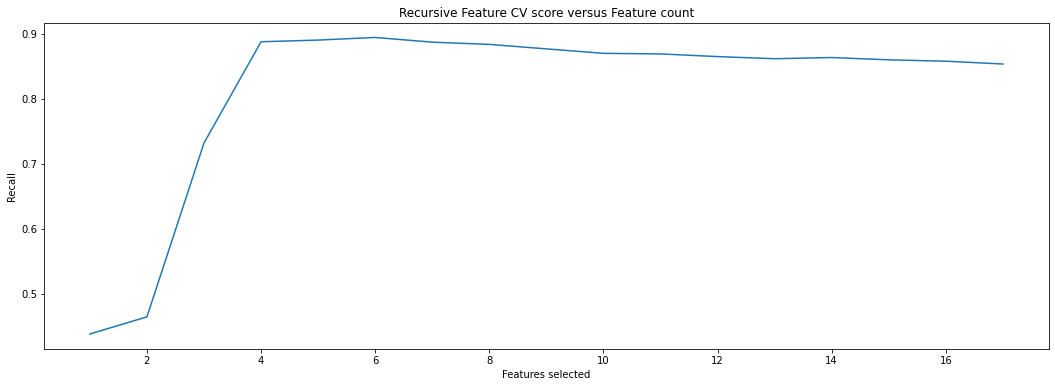

In [61]:
# Plot features selected against the model score
plt.figure(figsize=(18,6))
plt.title('Recursive Feature CV score versus Feature count')
plt.xlabel("Features selected")
plt.ylabel("Recall")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

In [47]:
# Set the training and test sets using just the reduced features 
# identified from the RFECV exercise conducted above
X_train_reduced_features = X_train[X_train.columns[selector.support_]]
X_test_reduced_features = X_test[X_test.columns[selector.support_]]

In [48]:
# Review the reduced features for the training data
X_train_reduced_features.head(2)

,x2,x3,x7,x8,x9,x12,x20,x23,x27,x28,x32,x37,x38,x40,x42,x46,x48,x49
148087,0.379438,0.411585,0.446122,0.787073,0.500812,0.412573,0.515263,0.413684,0.623665,0.394348,0.4,0.473806,0.518269,0.501370,0.48113,0.623751,0.607118,0.634293
104909,0.300386,0.486774,0.561974,0.689705,0.332694,0.687903,0.447419,0.455964,0.407315,0.481023,0.5,0.462753,0.369177,0.421769,0.51585,0.693056,0.672425,0.618994


In [49]:
# Review the reduced features for the testing data
X_test_reduced_features.head(2)

,x2,x3,x7,x8,x9,x12,x20,x23,x27,x28,x32,x37,x38,x40,x42,x46,x48,x49
123113,0.433619,0.524430,0.608014,0.451174,0.410021,0.518398,0.455950,0.470467,0.296940,0.441103,0.6,0.553541,0.510291,0.462493,0.515677,0.518159,0.832849,0.542068
106577,0.470849,0.340155,0.469993,0.278721,0.442359,0.431604,0.434921,0.674535,0.544612,0.419855,0.6,0.432189,0.398144,0.382463,0.366481,0.508459,0.293954,0.491576


---
## Training the models using the reduced dimensions (features) from above

Using default parameters to establish a baseline with reduced features before proceeding to the **parameter tuning phase** using a **Randomized Search** approach.

---
### Decision Tree Model

Decision trees are primarily leveraged to address both regression and classification cases. 
- **Classification tree models are used to predict a qualitative response**
- **Regression tree models are used to predict a quantitative response**

The algorithm constructs a tree using a training dataset where each node is an attribute and the branches are the corresponding values.

---

In [50]:
# Establish the parameters for DECISION TREE and run the model
clf_DT_default = DecisionTreeClassifier(random_state=rand_state)
clf_DT_default.fit(X_train_reduced_features, y_train)
y_pred = clf_DT_default.predict(X_test_reduced_features)

(FP, FN, Cost) = confusion_mat(y_test, y_pred)
results_df = results_df.append({'Classifier':'Decision Tree'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Default'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    21146   2792
1.0     2735  13305

Classification Report::
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88     23938
         1.0       0.83      0.83      0.83     16040

    accuracy                           0.86     39978
   macro avg       0.86      0.86      0.86     39978
weighted avg       0.86      0.86      0.86     39978



---
### Random Forest Model

Random Forests are primarily based on Decision trees. 
- Are an ensemble of decision trees trained using the bagging methodology. 
- Leverages randomness when growing trees rather than just searching for the best feature when splitting a node.
- Seeks the best feature among a random subset of features. 
- Delivers an enhanced model by trading higher bias for lower variance. 

Random Forests are useful in gaining a good understanding of feature importance especially when performing feature selection.

---

In [51]:
# Establish the parameters for RANDOM FOREST and run the model
clf_RF_default = RandomForestClassifier(random_state=rand_state)
clf_RF_default.fit(X_train_reduced_features, y_train)
y_pred = clf_RF_default.predict(X_test_reduced_features)

(FP, FN, Cost) = confusion_mat(y_test, y_pred)
results_df = results_df.append({'Classifier':'Random Forest'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Default'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    23035    903
1.0     1575  14465

Classification Report::
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     23938
         1.0       0.94      0.90      0.92     16040

    accuracy                           0.94     39978
   macro avg       0.94      0.93      0.94     39978
weighted avg       0.94      0.94      0.94     39978



### XGBoost Model

XGBoost is an optimized distributed gradient boosting library designed for high efficiency, flexibility and portability. 
- Machine learning algorithms are deployed leveraging the Gradient Boosting framework. 
- It provides a parallel tree boosting approach (GBDT, GBM) which is fast and accurate for solving data science problems. 

In [52]:
# Establish the parameters for XGBOOST and run the model
clf_XGB_default = XGBClassifier(random_state=rand_state)
clf_XGB_default.fit(X_train_reduced_features, y_train)
y_pred = clf_XGB_default.predict(X_test_reduced_features)

(FP, FN, Cost) = confusion_mat(y_test, y_pred)
results_df = results_df.append({'Classifier':'XGB'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Default'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22666   1272
1.0     1529  14511

Classification Report::
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.94     23938
         1.0       0.92      0.90      0.91     16040

    accuracy                           0.93     39978
   macro avg       0.93      0.93      0.93     39978
weighted avg       0.93      0.93      0.93     39978



In [48]:
# Review the combined results matrix
results_df

,Classifier,Features,Parameters,False_Positives,False_Negatives,Cost
0,Logistic Regression,Full,Default,4238,7699,3891880
1,SGD,Full,Default,3881,8092,4084810
2,Decision Tree,Full,Default,3094,3000,1530940
3,Random Forest,Full,Default,1034,2193,1106840
4,XGB,Full,Default,1267,1698,861670
5,Decision Tree,Reduced,Default,2792,2735,1395420
6,Random Forest,Reduced,Default,903,1575,796530
7,XGB,Reduced,Default,1272,1529,777220


# RandomizedSearchCV to choose best parameters

In RandomizedSearchCV all hyperparameter values are not tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using RandomizedSearchCV in this exercise and see how this works.

#### Options for RandomizedSearchCV
- estimator - A object of that type is instantiated for each grid point.
    - Assigned as per the algorithm we are tuning
- param_distributions - Dictionary with parameters names (string) as keys and distributions or lists of parameters to try.
    - Assigned as per the algorithm we are tuning
- scoring - A single string to evaluate the predictions on the test set.
    - ['precision' , 'recall' , 'accuracy']
- cv - Determines the cross-validation splitting strategy.
    - 5
- refit - Refit an estimator using the best found parameters on the whole dataset.
    - recall
n_iterint - Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.
    - 10

In [49]:
scores = ['precision'
          , 'recall'
          , 'accuracy'
         ]

In [50]:
print(scores)

['precision', 'recall', 'accuracy']


In [51]:
def report_perf(clf, n_top = 3, clf_name = "", verbose=True):
    if(verbose):
        for n in range(1, n_top+1):
            candidates = np.flatnonzero(clf.cv_results_['rank_test_recall'] == n)
            for candidate in candidates:
                print('Model with rank: {0}'.format(n))
                print('Mean validation score (Recall on Test): {0:.3f} (std: {1:.3f})'.format(
                    clf.cv_results_['mean_test_recall'][candidate], clf.cv_results_['std_test_recall'][candidate]))
                print('ParametersL {0}',format(clf.cv_results_['params'][candidate]))
    return{'Classifier': clf_name
           , 'Best_Parameters': str(clf.best_params_)
           , 'Best_Estimator': str(clf.best_estimator_)
#           , 'Accuracy_Mean':clf.cv_results_['mean_test_acc'][clf.best_index_]
#           , 'Accuracy_std':clf.cv_results_['std_test_acc'][clf.best_index_]
           , 'Precision_Mean':clf.cv_results_['mean_test_precision'][clf.best_index_]
           , 'Precision_std':clf.cv_results_['std_test_precision'][clf.best_index_]
           , 'Recall_Mean':clf.cv_results_['mean_test_recall'][clf.best_index_]
           , 'Recall_std':clf.cv_results_['std_test_recall'][clf.best_index_]
          }

# Decision Tree

We are tuning for the following parameters for *Decision Tree Classifier*:
- max_depth: The maximum depth of the tree.
    - [10, 20, 30, None]
- max_features: The number of features to consider when looking for the best split
    - ['auto', 'sqrt']
- criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
    - ['gini','entropy']
- min_samples_leaf: The minimum number of samples required to be at a leaf node.  
    - [1, 2, 4]
- min_samples_split: The minimum number of samples required to split an internal node
    - [2, 5, 10]
- random_state - If int, random_state is the seed used by the random number generator
    - 10

In [52]:
tuned_parameters_DT={'max_depth': [10, 20, 30, None]
                     , 'max_features': ['auto', 'sqrt']
                     , 'criterion':['gini','entropy']
                     , 'min_samples_leaf': [1, 2, 4]
                     , 'min_samples_split': [2, 5, 10]
                    }

clf_DT = DecisionTreeClassifier(random_state=rand_state)

In [53]:
#%%time

random_search_DT = RandomizedSearchCV(estimator=clf_DT
                                      , param_distributions=tuned_parameters_DT
                                      , cv = 5
                                      , scoring = scores
                                      , refit ='recall'
                                      , n_iter=10
                                     )

In [54]:
random_search_DT.fit(X_train_reduced_features, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=10,
            

In [55]:
DT_report = report_perf(random_search_DT, n_top = 3, clf_name='Decision_Tree')
DT_report

Model with rank: 1
Mean validation score (Recall on Test): 0.803 (std: 0.003)
ParametersL {0} {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy'}
Model with rank: 2
Mean validation score (Recall on Test): 0.801 (std: 0.003)
ParametersL {0} {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
Model with rank: 3
Mean validation score (Recall on Test): 0.801 (std: 0.004)
ParametersL {0} {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}


{'Classifier': 'Decision_Tree',
 'Best_Parameters': "{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'entropy'}",
 'Best_Estimator': "DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',\n                       max_depth=20, max_features='auto', max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=5,\n                       min_weight_fraction_leaf=0.0, presort='deprecated',\n                       random_state=10, splitter='best')",
 'Precision_Mean': 0.8196364797229168,
 'Precision_std': 0.005316475748262003,
 'Recall_Mean': 0.8026143723098986,
 'Recall_std': 0.00318892962352034}

# Random Forest

We are tuning the following parameters for Random Forest Classifier:
- n_estimators: The number of trees in the forest.
    - [100, 200]
- max_depth: The maximum depth of the tree.
    - [25, 50, None]
- criterion: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
    - ['gini','entropy']
- min_samples_leaf: The minimum number of samples required to be at a leaf node.
    - [1, 25, 50]
- max_features: The number of features to consider when looking for the best split.
    - [.2, .3, 'auto']
- min_samples_split: The minimum number of samples required to split an internal node.
    - [2, 4, 8, 10, 12]

In [56]:
tuned_parameters_RF={'n_estimators':[100, 200]
                     , 'max_depth':[25, 50, None]
                     , 'criterion':['gini','entropy']
                     , 'min_samples_leaf': [1, 25, 50]
                     , 'max_features':[.2, .3, 'auto']
                     , 'min_samples_split':[2, 4, 8, 10, 12]
                    }

clf_RF = RandomForestClassifier(random_state=rand_state)

In [57]:
#%%time

random_search_RF = RandomizedSearchCV(estimator=clf_RF
                                      , param_distributions=tuned_parameters_RF
                                      , cv = 5
                                      , scoring = scores
                                      , refit = 'recall'
                                      , n_iter=10
                                     )

random_search_RF.fit(X_train_reduced_features, y_train)

RF_report = report_perf(random_search_RF, n_top = 3, clf_name='Random_Forest')

Model with rank: 1
Mean validation score (Recall on Test): 0.898 (std: 0.002)
ParametersL {0} {'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy'}
Model with rank: 2
Mean validation score (Recall on Test): 0.897 (std: 0.002)
ParametersL {0} {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 0.2, 'max_depth': 25, 'criterion': 'gini'}
Model with rank: 3
Mean validation score (Recall on Test): 0.895 (std: 0.001)
ParametersL {0} {'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'gini'}


In [58]:
RF_report

{'Classifier': 'Random_Forest',
 'Best_Parameters': "{'n_estimators': 100, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 50, 'criterion': 'entropy'}",
 'Best_Estimator': "RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='entropy', max_depth=50, max_features='auto',\n                       max_leaf_nodes=None, max_samples=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=12,\n                       min_weight_fraction_leaf=0.0, n_estimators=100,\n                       n_jobs=None, oob_score=False, random_state=10, verbose=0,\n                       warm_start=False)",
 'Precision_Mean': 0.9359847437548531,
 'Precision_std': 0.002862714564129363,
 'Recall_Mean': 0.8983976763553722,
 'Recall_std': 0.0015151965627338807}

# XGBoost

We are tuning the following parameters for XGBoost:
- n_estimators: Number of gradient boosted trees. Equivalent to number of boosting rounds.
    - [100, 150, 1000]
- learning_rate: Boosting learning rate (xgb’s “eta”)
    - [0.01, 0.6, None]
- subsample: Subsample ratio of the training instances.
    - [0.3, 0.9, None]
- max_depth: Maximum depth of a tree.
    - [3, 4, 5, 6, 7, 8, 9, None]
- colsample_bytree: The subsample ratio of columns when constructing each tree. Subsampling occurs once for every tree constructed.
    - [0.5, 0.9, None]
- min_child_weight: Minimum sum of instance weight (hessian) needed in a child.
    - [1, 2, 3, 4, None]

In [59]:
tuned_parameters_XGB={'n_estimators': [100, 150, 1000]
                      , 'learning_rate': [0.01, 0.6, None]
                      , 'subsample': [0.3, 0.9, None]
                      , 'max_depth': [3, 4, 5, 6, 7, 8, 9, None]
                      , 'colsample_bytree': [0.5, 0.9, None]
                      , 'min_child_weight': [1, 2, 3, 4, None]
                     }

clf_XGB = XGBClassifier(random_state=rand_state)

In [60]:
#%%time

random_search_XGB = RandomizedSearchCV(estimator=clf_XGB
                                      , param_distributions=tuned_parameters_XGB
                                      , cv = 5
                                      , scoring = scores
                                      , refit ='recall'
                                      , n_iter=10
                                     )

In [61]:
random_search_XGB.fit(X_train_reduced_features, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'colsample_bytree': [0.5, 0.9, None],
                                        '

In [62]:
XGB_report = report_perf(random_search_XGB, n_top = 3, clf_name='XGBoost')

Model with rank: 1
Mean validation score (Recall on Test): 0.930 (std: 0.001)
ParametersL {0} {'subsample': 0.9, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': None, 'colsample_bytree': None}
Model with rank: 2
Mean validation score (Recall on Test): 0.911 (std: 0.002)
ParametersL {0} {'subsample': None, 'n_estimators': 100, 'min_child_weight': 4, 'max_depth': 8, 'learning_rate': 0.6, 'colsample_bytree': 0.9}
Model with rank: 3
Mean validation score (Recall on Test): 0.906 (std: 0.002)
ParametersL {0} {'subsample': None, 'n_estimators': 150, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.6, 'colsample_bytree': 0.9}


### Append random_state to the best parameters

We assign the best parameters from each of the Random Search to a variable and then add the random state parameter to it. These variables will be passed on to train the models with reduced features and best parameters.

In [63]:
DT_best_params = random_search_DT.best_params_
DT_best_params['random_state'] = rand_state

RF_best_params = random_search_RF.best_params_
RF_best_params['random_state'] = rand_state

XGB_best_params = random_search_XGB.best_params_
XGB_best_params['random_state'] = rand_state

### Train the model with the best parameters.

#### Decision Tree
- The best parameter (with random_state) from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [64]:
clf_DT_best = DecisionTreeClassifier(**DT_best_params)
clf_DT_best.fit(X_train_reduced_features, y_train)

y_pred_DT = clf_DT_best.predict(X_test_reduced_features)

(FP, FN, Cost) = confusion_mat(y_test, y_pred_DT)
results_df = results_df.append({'Classifier':'Decision Tree'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    21323   2615
1.0     3075  12965

Classification Report::
              precision    recall  f1-score   support

         0.0       0.87      0.89      0.88     23938
         1.0       0.83      0.81      0.82     16040

    accuracy                           0.86     39978
   macro avg       0.85      0.85      0.85     39978
weighted avg       0.86      0.86      0.86     39978



#### Random Forest
- The best estimator from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [65]:
clf_RF_best = RandomForestClassifier(**RF_best_params)
clf_RF_best.fit(X_train_reduced_features, y_train)

y_pred_RF = clf_RF_best.predict(X_test_reduced_features)

(FP, FN, Cost) = confusion_mat(y_test, y_pred_RF)
results_df = results_df.append({'Classifier':'Random Forest'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22966    972
1.0     1583  14457

Classification Report::
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     23938
         1.0       0.94      0.90      0.92     16040

    accuracy                           0.94     39978
   macro avg       0.94      0.93      0.93     39978
weighted avg       0.94      0.94      0.94     39978



#### XGBoost
- The best estimator from the previous step is chosen as classifier
- Confusion Matrix and Classification Reports are displayed 

In [66]:
clf_XGB_Best = XGBClassifier(**XGB_best_params)
clf_XGB_Best.fit(X_train_reduced_features, y_train)

y_pred_XGB = clf_XGB_Best.predict(X_test_reduced_features)

(FP, FN, Cost) = confusion_mat(y_test, y_pred_XGB)
results_df = results_df.append({'Classifier':'XGB'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    23086    852
1.0     1080  14960

Classification Report::
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     23938
         1.0       0.95      0.93      0.94     16040

    accuracy                           0.95     39978
   macro avg       0.95      0.95      0.95     39978
weighted avg       0.95      0.95      0.95     39978



# Ensemble Models

The goal of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Stacking, also called Super Learning or Stacked Regression, is a class of algorithms that involves training a second-level "metalearner" to find the optimal combination of the base learners. Unlike bagging and boosting, the goal in stacking is to ensemble strong, diverse sets of learners together.

![title](img/EnsembleModels3.png) 

References: https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html


### Ensemble Model 1 - Stacking

The first ensemble technique uses the vecstack package for stacking. It is compatible with the scikit-learn API to automate OOF computation, prediction and bagging using multiple models and stages.

![title](img/EnsembleModels.png) 

Reference: https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/

Below, we use the Best Decision Tree and Random Forest classifiers in Stage 1. The Stage 1 output is passed on to Stage 2 which uses the XGBoost classifier with the best parameters. Finally, Logistic Regression is used as the Meta Classifier to predict the outcome and compare against the test dataset. 

In [67]:
models_1 = [clf_DT_best
            , clf_RF_best]

# Get out-of-fold predictions from 1-level models
S_1_train, S_1_test = stacking(models_1
                               , X_train_reduced_features
                               , y_train
                               , X_test_reduced_features
                               , regression = True
                               , metric=recall_score
                               , verbose = 2)

task:         [regression]
metric:       [recall_score]
mode:         [oof_pred_bag]
n_models:     [2]

model  0:     [DecisionTreeClassifier]
    fold  0:  [0.79536839]
    fold  1:  [0.80399365]
    fold  2:  [0.80175512]
    fold  3:  [0.79553564]
    ----
    MEAN:     [0.79916320] + [0.00379510]
    FULL:     [0.79914379]

model  1:     [RandomForestClassifier]
    fold  0:  [0.89467612]
    fold  1:  [0.89840421]
    fold  2:  [0.89728374]
    fold  3:  [0.89519542]
    ----
    MEAN:     [0.89638987] + [0.00151824]
    FULL:     [0.89638189]



In [68]:
# Initialize 2-level models
models_2 = [clf_XGB_Best]

# Get out-of-fold predictions from 2-level models
S_2_train, S_2_test = stacking(models_2
                               , S_1_train
                               , y_train
                               , S_1_test
                               , regression = True
                               , metric=recall_score
                               , verbose = 2)

task:         [regression]
metric:       [recall_score]
mode:         [oof_pred_bag]
n_models:     [1]

model  0:     [XGBClassifier]
    fold  0:  [0.89467612]
    fold  1:  [0.89840421]
    fold  2:  [0.89728374]
    fold  3:  [0.89519542]
    ----
    MEAN:     [0.89638987] + [0.00151824]
    FULL:     [0.89638189]



In [69]:
# Initialize 3-level model
model = LogisticRegression(random_state=rand_state)
# Fit
model.fit(S_2_train, y_train)
# Get final prediction
y_pred_ensemble = model.predict(S_2_test)

In [70]:
(FP, FN, Cost) = confusion_mat(y_test, y_pred_ensemble)
results_df = results_df.append({'Classifier':'Ensemble_1'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    22863   1075
1.0     1482  14558

Classification Report::
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95     23938
         1.0       0.93      0.91      0.92     16040

    accuracy                           0.94     39978
   macro avg       0.94      0.93      0.93     39978
weighted avg       0.94      0.94      0.94     39978



In [71]:
recall_score(y_test, y_pred_ensemble)

0.9076059850374065

### Ensemble Model 2

The second ensemble technique uses the StackingCVClassifier from mlxtend package. 

![title](img/Ensemble_StackingCVClassifier.png) 

Reference: http://rasbt.github.io/mlxtend/user_guide/classifier/StackingCVClassifier/

In this model, we pass all our 3 best models (Decision Tree, Random Forest and XGBoost) together in 1 stage. Similar to the previous ensemble model, we use Logistic Regression as our Meta-Classifier.

In [72]:
sclf = StackingCVClassifier(classifiers=[clf_DT_best, clf_RF_best, clf_XGB_Best]
                            , use_probas=True
                            , random_state= rand_state
                            , meta_classifier=LogisticRegression(random_state=rand_state))

In [73]:
label = ['Decision Tree', 'Random Forest', 'XGBoost', 'Stacking Classifier']
clf_list = [clf_DT_best, clf_RF_best, clf_XGB_Best, sclf]
    
sclf.fit(X_train_reduced_features, y_train)
y_pred_sclf = sclf.predict(X_test_reduced_features)

In [74]:
(FP, FN, Cost) = confusion_mat(y_test, y_pred_sclf)
results_df = results_df.append({'Classifier':'Ensemble_2'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    23077    861
1.0     1092  14948

Classification Report::
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96     23938
         1.0       0.95      0.93      0.94     16040

    accuracy                           0.95     39978
   macro avg       0.95      0.95      0.95     39978
weighted avg       0.95      0.95      0.95     39978



### Ensemble Model 3

Stack of estimators with a final classifier. Stacked generalization consists in stacking the output of individual estimator and use a classifier to compute the final prediction. Stacking allows to use the strength of each individual estimator by using their output as input of a final estimator.

![title](img/StackOfEstimatorsWithFinalClassifier.png)

Reference: https://towardsdatascience.com/stacking-classifiers-for-higher-predictive-performance-566f963e4840


In this step, we use multi-layer classsifier technique. In multi-layer classifier, we assign the final estimator to a stacking classifier.

In [75]:
final_layer = StackingClassifier(estimators=[('rf', clf_RF_best)
                                            , ('xgb', clf_XGB_Best)]
                                , final_estimator=LogisticRegression(random_state=rand_state)
                               )

multi_layer_regressor = StackingClassifier(estimators=[('dt', clf_DT_best)]
                                          , final_estimator=final_layer
                                         )

multi_layer_regressor.fit(X_train_reduced_features, y_train)

y_pred_multi = multi_layer_regressor.predict(X_test_reduced_features)

In [76]:
(FP, FN, Cost) = confusion_mat(y_test, y_pred_multi)
results_df = results_df.append({'Classifier':'Ensemble_3'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    21583   2355
1.0     3417  12623

Classification Report::
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     23938
         1.0       0.84      0.79      0.81     16040

    accuracy                           0.86     39978
   macro avg       0.85      0.84      0.85     39978
weighted avg       0.86      0.86      0.85     39978



### Ensemble Model 4

Ensemble Model 4 is similar to Ensemble Model 3. However, in this step, we use a single stacking layer with Decision Tree, Random Forest and XGBoost with the best parameters passed as ensemble estimators. 

![title](img/EnsembleModels2.png)

Reference: https://blogs.sas.com/content/subconsciousmusings/2017/05/18/stacked-ensemble-models-win-data-science-competitions/


SGD is chosen as the final estimator or meta-classifier as discussed in Ensemble Model 1 and 2.

In [77]:
ensemble_estimators = [('rf', clf_RF_best)
                       , ('xgb', clf_XGB_Best)
                       , ('dt', clf_DT_best)
#                       , ('logistic', LogisticRegression(random_state=rand_state))
                      ]

clf_ensemble = StackingClassifier(estimators=ensemble_estimators
                                  , final_estimator=SGDClassifier(random_state=rand_state)
#                                  , final_estimator=SVC(gamma = 0.5, random_state=rand_state)
                                 )

clf_ensemble.fit(X_train_reduced_features, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=50,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=12,
                                   

In [78]:
y_pred_ens = clf_ensemble.predict(X_test_reduced_features)

In [79]:
(FP, FN, Cost) = confusion_mat(y_test, y_pred_ens)
results_df = results_df.append({'Classifier':'Ensemble_4'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    23079    859
1.0     1076  14964

Classification Report::
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     23938
         1.0       0.95      0.93      0.94     16040

    accuracy                           0.95     39978
   macro avg       0.95      0.95      0.95     39978
weighted avg       0.95      0.95      0.95     39978



# Ensemble Model 5

Ensemble model 5 is the same as Ensemble Model 4. The only difference is that we are using SMV (SVC) as the final estimator here instead of SGD.

In [80]:
ensemble_estimators_5 = [('rf', clf_RF_best)
                       , ('xgb', clf_XGB_Best)
                       , ('dt', clf_DT_best)
#                       , ('logistic', LogisticRegression(random_state=rand_state))
                      ]

clf_ensemble_5 = StackingClassifier(estimators=ensemble_estimators_5
#                                   , final_estimator=SGDClassifier(random_state=rand_state)
                                    , final_estimator=SVC(gamma = 0.5, random_state=rand_state)
                                 )

clf_ensemble_5.fit(X_train_reduced_features, y_train)

StackingClassifier(cv=None,
                   estimators=[('rf',
                                RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='entropy',
                                                       max_depth=50,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=12,
                                   

In [81]:
y_pred_ens_5 = clf_ensemble_5.predict(X_test_reduced_features)

In [82]:
(FP, FN, Cost) = confusion_mat(y_test, y_pred_ens_5)
results_df = results_df.append({'Classifier':'Ensemble_5'
                                    , 'Features':'Reduced'
                                    , 'Parameters': 'Best'
                                    , 'False_Positives': FP
                                    , 'False_Negatives': FN
                                    , 'Cost': Cost
                                   }
                                   , ignore_index=True
                                  )

Confusion Matrix::

col_0    0.0    1.0
y                  
0.0    23067    871
1.0     1060  14980

Classification Report::
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     23938
         1.0       0.95      0.93      0.94     16040

    accuracy                           0.95     39978
   macro avg       0.95      0.95      0.95     39978
weighted avg       0.95      0.95      0.95     39978



In [83]:
results_df.sort_values(by = 'Cost')

,Classifier,Features,Parameters,False_Positives,False_Negatives,Cost
15,Ensemble_5,Reduced,Best,871,1060,538710
14,Ensemble_4,Reduced,Best,859,1076,546590
10,XGB,Reduced,Best,852,1080,548520
12,Ensemble_2,Reduced,Best,861,1092,554610
11,Ensemble_1,Reduced,Best,1075,1482,751750
7,XGB,Reduced,Default,1272,1529,777220
6,Random Forest,Reduced,Default,903,1575,796530
9,Random Forest,Reduced,Best,972,1583,801220
4,XGB,Full,Default,1267,1698,861670
3,Random Forest,Full,Default,1034,2193,1106840


# Conclusion


# References

- https://jamesrledoux.com/code/imputation
- https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/
- https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
- https://stackoverflow.com/questions/60393024/rfecv-for-classification-giving-keyerror-weight
- https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html
- https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python
- https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e
- https://scikit-learn.org/stable/modules/ensemble.html